# Code along for Probability 

## Import libries

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from zipfile import ZipFile
from functools import reduce
import os

## Load files

### Extract the zip


In [231]:
path="data/archive_2.zip"
extratedfile="data/new_files"

# extracted the files to path "data/new_files"
with ZipFile (path, 'r') as f:
    f.extractall(extratedfile)

### Load to dataframe

In [232]:
# let load the extracted files into dictionary
dataframes={}
for file in os.listdir(extratedfile):
    if file.endswith("csv"):
        file_path= os.path.join(extratedfile,file)
        dataframes[file]= pd.read_csv(file_path)

In [233]:
# let view the list of our dataset
for name, df in dataframes.items():
    print(name)

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


### Let load each dataset into appropriate variable

In [234]:
# Let load customer
customers=pd.read_csv(f'{extratedfile}/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [235]:
# Let load geolocation
geolocation=pd.read_csv(f'{extratedfile}/olist_geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [236]:
# Let load order items
order_items=pd.read_csv(f'{extratedfile}/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [237]:
# Let load order payment
order_payments=pd.read_csv(f'{extratedfile}/olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [238]:
# Let load Orders review
order_reviews=pd.read_csv(f'{extratedfile}/olist_order_reviews_dataset.csv')
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [239]:
# Let load orders
orders=pd.read_csv(f'{extratedfile}/olist_orders_dataset.csv')
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [240]:
# let load products
products=pd.read_csv(f'{extratedfile}/olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [241]:
# Let load selllers
sellers=pd.read_csv(f'{extratedfile}/olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [242]:
# let load product category_name
product_category=pd.read_csv(f'{extratedfile}/product_category_name_translation.csv')
product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Check for column interset for all the datas

In [243]:
# to check all intersection let get all the column heads
all_file_columns={name: set(df.columns) for name,df in dataframes.items()}
column_interset= reduce(set.intersection,all_file_columns.values())
print("The intersect column is:", column_interset)

The intersect column is: set()


## Merge the data set 

In [244]:
# check all the columns for each dataset
for name, file in all_file_columns.items():
    print(f"{name}: {list(file)}")

olist_customers_dataset.csv: ['customer_unique_id', 'customer_zip_code_prefix', 'customer_state', 'customer_id', 'customer_city']
olist_geolocation_dataset.csv: ['geolocation_city', 'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_state', 'geolocation_lng']
olist_orders_dataset.csv: ['order_delivered_carrier_date', 'order_approved_at', 'order_purchase_timestamp', 'order_id', 'order_status', 'order_estimated_delivery_date', 'customer_id', 'order_delivered_customer_date']
olist_order_items_dataset.csv: ['order_item_id', 'order_id', 'product_id', 'shipping_limit_date', 'price', 'freight_value', 'seller_id']
olist_order_payments_dataset.csv: ['payment_value', 'order_id', 'payment_type', 'payment_installments', 'payment_sequential']
olist_order_reviews_dataset.csv: ['order_id', 'review_comment_message', 'review_answer_timestamp', 'review_id', 'review_comment_title', 'review_score', 'review_creation_date']
olist_products_dataset.csv: ['product_description_lenght', 'product_phot

In [245]:
# merging the file if required
# Merge customers and orders on customer_id
orders_customers= pd.merge(orders,customers, on="customer_id", how="right")
orders_customers.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [246]:
# orders_customers(merge of customers and orders) + Order_payment
orders_payments = pd.merge(orders_customers, order_payments, on="order_id", how="left")
orders_payments.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1.0,credit_card,2.0,146.87
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1.0,credit_card,8.0,335.48


In [247]:
# Order_payment (the last merge )+ order_review
orders_reviews = pd.merge(orders_payments, order_reviews, on="order_id", how="left")
orders_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,060e732b5b29e8181a18229c7b0b2b5e,1151,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,259dac757896d24d7702b9acbbff3f3c,8775,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,345ecd01c38d18a9036ed96c73b8d066,13056,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [248]:
# orders_reviews(the last merge )+ order_item
orders_items= pd.merge(orders_reviews, order_items, on="order_id", how="left")
orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,...,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,...,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,060e732b5b29e8181a18229c7b0b2b5e,1151,...,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,259dac757896d24d7702b9acbbff3f3c,8775,...,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,345ecd01c38d18a9036ed96c73b8d066,13056,...,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [249]:
# orders_items(the last merge )+ product
orders_products = pd.merge(orders_items, products, on="product_id", how="left")
orders_products.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0


In [250]:
# orders_products (last merge) + Product Category Translation
orders_pro = pd.merge(orders_products, product_category, on="product_category_name", how="left")
orders_products.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,...,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0


In [251]:
orders_sellers = pd.merge(orders_products, sellers, on="seller_id", how="left")
orders_sellers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,060e732b5b29e8181a18229c7b0b2b5e,1151,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,259dac757896d24d7702b9acbbff3f3c,8775,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,345ecd01c38d18a9036ed96c73b8d066,13056,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [252]:
# Customers + Geolocation (via zip prefix)
geo_unique = geolocation.groupby("geolocation_zip_code_prefix").first().reset_index()
final_df= pd.merge(
    orders_sellers,
    geo_unique,
    left_on="customer_zip_code_prefix", 
    right_on="geolocation_zip_code_prefix", 
    how="left" 
)

final_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,...,64.0,31.0,8577.0,itaquaquecetuba,SP,14409.0,-20.509897,-47.397866,franca,SP
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,...,15.0,40.0,88303.0,itajai,SC,9790.0,-23.726853,-46.545746,sao bernardo do campo,SP
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,060e732b5b29e8181a18229c7b0b2b5e,1151,...,52.0,17.0,8577.0,itaquaquecetuba,SP,1151.0,-23.527788,-46.660310,sao paulo,SP
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,259dac757896d24d7702b9acbbff3f3c,8775,...,51.0,28.0,8577.0,itaquaquecetuba,SP,8775.0,-23.496930,-46.185352,mogi das cruzes,SP
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,345ecd01c38d18a9036ed96c73b8d066,13056,...,15.0,35.0,14940.0,ibitinga,SP,13056.0,-22.987222,-47.151073,campinas,SP


## Probability

#### 1. Probability of an Event
Question: What is the probability that a randomly chosen order received a 5-star review?

In [253]:
# probability probability that a randomly chosen order received a 5-star review
FiveStar_review= order_reviews['review_score']==5
p_5star= FiveStar_review.mean()
print(f"probability of 5 stars = {round(p_5star *100,2)}%")

probability of 5 stars = 57.78%


**Interpretation**

probability that a randomly chosen order received a 5-star review is 57.78%. This show that on average, customer is happy with the service

#### 2. Complementary Probability

Concept: 
𝑃(A complement) = 1−P(A)

Question: What is the probability that a review is not 5 stars?

In [254]:
# since we know prob. of getting 5 star, so 𝑃(A complement) = 1−P(A)
p_not_5star= 1-p_5star
print(f"probability of not 5 stars = {round(p_not_5star *100,2)}%")

probability of not 5 stars = 42.22%


**Interpretation**

Aproximately 42% of customer gave less than 5 star, which indicate customers are satisfied with the service and give 5 start reviews more.

#### 3. Joint Probability

Concept: P(A∩B)

Question: What is the probability that an order was paid by credit card and received a 5-star review?

In [255]:
# let merge the order_payment and Order_review table together
order_review_payment= pd.merge(orders_reviews,orders_payments,on="order_id", how="left")

# let get P(credit _card and 5star)
Credit_card_5star= ((order_review_payment['payment_type_y']=="credit_card")&(order_review_payment['review_score']==5)).sum()
p_5star_Credit_card= Credit_card_5star/ len(order_review_payment)
print(f"probability of (credit _card and 5star) = {round(p_5star_Credit_card *100,2)}%")

probability of (credit _card and 5star) = 37.51%


**Interpretation**

Aproximately 38% of customers that use credit card method give 5 star  reviews

#### 4. Conditional Probability

Concept:

`𝑃(𝐴∣𝐵)=𝑃(𝐴∩𝐵)/𝑃(𝐵)` 
                
`𝑃(𝐴∣𝐵)= Favourable_outcomes / Total_credit_card_outcomes`


Question: What is the probability that a review is 5 stars given that the payment was made by credit card?
Do it for all:


In [256]:
# 𝑃(5∣credit_card)
Credit_card_5star= ((order_review_payment["payment_type_y"]=="credit_card")&(order_review_payment['review_score']==5)).sum()
tot_credit_card = (order_review_payment["payment_type_y"]=="credit_card").sum()
p_5star_given_Credit_card= Credit_card_5star/tot_credit_card
print(f"probability of (credit _card and 5star) = {round(p_5star_given_Credit_card *100,2)}%")

# P(5∣voucher)
voucher_5star= ((order_review_payment["payment_type_y"]=="voucher")&(order_review_payment['review_score']==5)).sum()
tot_voucher = (order_review_payment["payment_type_y"]=="voucher").sum()
p_5star_given_voucher= voucher_5star/tot_voucher
print(f"probability of (voucher and 5star) = {round(p_5star_given_voucher *100,2)}%")

# P(5∣boleto)
boleto_5star= ((order_review_payment["payment_type_y"]=="boleto")&(order_review_payment['review_score']==5)).sum()
tot_boleto = (order_review_payment["payment_type_y"]=="boleto").sum()
p_5star_given_boleto= boleto_5star/tot_boleto
print(f"probability of (boleto and 5star) = {round(p_5star_given_boleto *100,2)}%")

# P(5∣debit_card)
debit_card_5star= ((order_review_payment["payment_type_y"]=="debit_card")&(order_review_payment['review_score']==5)).sum()
tot_debit_card = (order_review_payment["payment_type_y"]=="debit_card").sum()
p_5star_given_debit_card= debit_card_5star/tot_debit_card
print(f"probability of (debit_card and 5star) = {round(p_5star_given_debit_card *100,2)}%")

# P(5∣not_defined)
not_defined_5star= ((order_review_payment["payment_type_y"]=="not_defined")&(order_review_payment['review_score']==5)).sum()
tot_not_defined = (order_review_payment["payment_type_y"]=="not_defined").sum()
p_5star_given_not_defined= not_defined_5star/tot_not_defined
print(f"probability of (not_defined and 5star) = {round(p_5star_given_not_defined *100,2)}%")

probability of (credit _card and 5star) = 57.39%
probability of (voucher and 5star) = 55.71%
probability of (boleto and 5star) = 56.95%
probability of (debit_card and 5star) = 60.17%
probability of (not_defined and 5star) = 0.0%


**Interpretation**
All the payment method received above 50% of 5-star rating

#### 5. Bayes’ Rule 

Concept:

`P(A∣B )= P(B∣A)⋅P(A) / P(B)`

A = payment

B = review =5

`P(payment | review=5) = P(review=5 | payment).p(payment) / p(review =5)`


Question: Given that an order received a 5-star review, what is the probability that it was paid with each payment method (credit_card, boleto, voucher)?


Among only the 5-star reviews, how are payment methods distributed?

In [257]:
# 𝑃(5∣credit_card)
Credit_card_5star= ((order_review_payment["payment_type_y"]=="credit_card")&(order_review_payment['review_score']==5)).sum()
tot_credit_card = (order_review_payment['review_score']==5).sum()
p_5star_given_Credit_card= Credit_card_5star/tot_credit_card
print(f"probability of (credit _card and 5star) = {round(p_5star_given_Credit_card *100,2)}%")

# P(5∣voucher)
voucher_5star= ((order_review_payment["payment_type_y"]=="voucher")&(order_review_payment['review_score']==5)).sum()
tot_voucher = (order_review_payment['review_score']==5).sum()
p_5star_given_voucher= voucher_5star/tot_voucher
print(f"probability of (voucher and 5star) = {round(p_5star_given_voucher *100,2)}%")

# P(5∣boleto)
boleto_5star= ((order_review_payment["payment_type_y"]=="boleto")&(order_review_payment['review_score']==5)).sum()
tot_boleto = (order_review_payment['review_score']==5).sum()
p_5star_given_boleto= boleto_5star/tot_boleto
print(f"probability of (boleto and 5star) = {round(p_5star_given_boleto *100,2)}%")

# P(5∣debit_card)
debit_card_5star= ((order_review_payment["payment_type_y"]=="debit_card")&(order_review_payment['review_score']==5)).sum()
tot_debit_card = (order_review_payment['review_score']==5).sum()
p_5star_given_debit_card= debit_card_5star/tot_debit_card
print(f"probability of (debit_card and 5star) = {round(p_5star_given_debit_card *100,2)}%")

# P(5∣not_defined)
not_defined_5star= ((order_review_payment["payment_type_y"]=="not_defined")&(order_review_payment['review_score']==5)).sum()
tot_not_defined = (order_review_payment['review_score']==5).sum()
p_5star_given_not_defined= not_defined_5star/tot_not_defined
print(f"probability of (not_defined and 5star) = {round(p_5star_given_not_defined *100,2)}%")

probability of (credit _card and 5star) = 65.74%
probability of (voucher and 5star) = 16.9%
probability of (boleto and 5star) = 16.05%
probability of (debit_card and 5star) = 1.31%
probability of (not_defined and 5star) = 0.0%


**Interpretation**
Customer who uses credit card give 5-star rating the customer uses every other poayment methods. Customer who uses credit card and give 5 start is approximately 66% while the rest is shared between other payment methods

## **Expectation and Variance**

**Question1**

What is the average delivery time (expectation) and variance (spread/consistency) of deliveries?

In [258]:
#  let extract data needed
order_review_payment.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,...,order_delivered_customer_date_y,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,...,2017-05-25 10:35:35,2017-06-05 00:00:00,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1.0,credit_card,2.0,146.87
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,...,2018-01-29 12:41:19,2018-02-06 00:00:00,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1.0,credit_card,8.0,335.48
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,060e732b5b29e8181a18229c7b0b2b5e,1151,...,2018-06-14 17:58:51,2018-06-13 00:00:00,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1.0,credit_card,7.0,157.73
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,259dac757896d24d7702b9acbbff3f3c,8775,...,2018-03-28 16:04:25,2018-04-10 00:00:00,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1.0,credit_card,1.0,173.30
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,345ecd01c38d18a9036ed96c73b8d066,13056,...,2018-08-09 20:55:48,2018-08-15 00:00:00,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1.0,credit_card,8.0,252.25


In [259]:
order_review_payment['order_purchase_timestamp_x']= pd.to_datetime(order_review_payment['order_purchase_timestamp_x'])
order_review_payment['order_delivered_customer_date_x']= pd.to_datetime(order_review_payment['order_delivered_customer_date_x'])

# let get the delivery time in day
order_review_payment["delivery_time_days"] = (order_review_payment['order_delivered_customer_date_x'] - order_review_payment['order_purchase_timestamp_x']).dt.days

# let drom the missing values
delivery_time =  order_review_payment["delivery_time_days"].dropna()

# Let find mean, variance and standard deviation
print("Expected delivery time (Mean):", round(delivery_time.mean(), 2), "days")
print("Variance of delivery time:", round(delivery_time.var(), 2))
print("Standard Deviation of delivery time:", round(delivery_time.std(), 2), "days")


Expected delivery time (Mean): 12.13 days
Variance of delivery time: 89.28
Standard Deviation of delivery time: 9.45 days


**Interpretation**
This shows that the expected delivery day range between 3 days to 22 days. This indicate that service is inconsistence (some customer get order 3 days and some get it 22days😒)

**Question2**

What is the expected customer review score and how much do reviews vary?

In [260]:
# Expected (Mean review score)
mean_review=order_review_payment['review_score'].mean()
# Variance and STD
var_review = order_review_payment['review_score'].var()
std_review = order_review_payment['review_score'].std()

print("Expected review score (Mean):", round(mean_review, 2))
print("Variance of review score:", round(var_review, 2))
print("Standard Deviation of review score:", round(std_review, 2))

Expected review score (Mean): 4.06
Variance of review score: 1.88
Standard Deviation of review score: 1.37


**Interpretation**
The resilt show that average customers give 4-star which represent total satisfaction. The STD show that most customers give btw 3 to 5-star review.

## **Sampling & Estimation**

**Question 1:**

 Take a random sample of 50 orders

In [261]:
# lets take a random sample of 50 orders
random50 = order_review_payment['payment_value_y'].sample(50,random_state=234 )
mean_randon50= random50.mean()
pop_mean =order_review_payment['payment_value_y'].mean()
print("Population mean payment value:", round(pop_mean, 2))
print("Sample mean (n=50):", round(mean_randon50, 2))

Population mean payment value: 135.83
Sample mean (n=50): 126.96


**Question 2:**

 Take a random sample of 200 orders

In [262]:
# lets take a random sample of 200 orders
random200 = order_review_payment['payment_value_y'].sample(200,random_state=234 )
mean_randon200= random200.mean()
pop_mean =order_review_payment['payment_value_y'].mean()
print("Population mean payment value:", round(pop_mean, 2))
print("Sample mean (n=200):", round(mean_randon200, 2))

Population mean payment value: 135.83
Sample mean (n=200): 165.03


**Interpretation**
The population mean is the average of the total population, in this case, average customer spending which is approximately $136.

The sample size 50 given $126 in compare to pop. mean shows that it is underestimate.

The sample size 200 given $126 in compare to pop. Shows that as sample size increases, the mean tense toward pop mean, which make it more accurate to use.


## **Law of Large Numbers (LLN)**

- The Law of Large Numbers says,

"As the sample size increases, the sample mean → converges to the true population mean"

- Let us experiment a bit...

In [263]:
sample_size= [10,50,100,500,1000,5000]
sample_mean=[]
pop_mean=order_review_payment['payment_value_y'].mean()
for  size in sample_size:
    sample_mean.append(order_review_payment['payment_value_y'].sample(size,random_state=234 ).mean())

print(f"sample size     Mean")
for size, mean in zip(sample_size,sample_size):
    print(f"Sample size={size}, Sample mean={round(mean,2)}")

print("Population mean (true):", round(pop_mean, 2))

sample size     Mean
Sample size=10, Sample mean=10
Sample size=50, Sample mean=50
Sample size=100, Sample mean=100
Sample size=500, Sample mean=500
Sample size=1000, Sample mean=1000
Sample size=5000, Sample mean=5000
Population mean (true): 135.83


## **Central Limit Theorem (CLT)**

**Question:**

Collect 100 samples of review_scores, take the mean. Repeat the same process a thousand times.
Then take all the 1000 means use it to plot a histogram and lets see what the shape or distribution would look like.


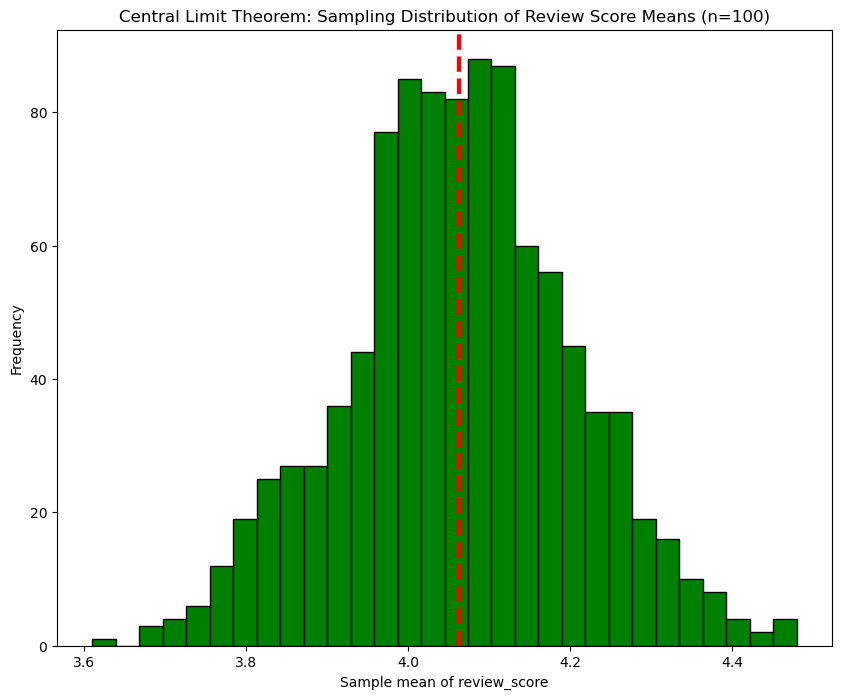

In [264]:
sample_means=[]
for i in range(1000):
    sample_means.append(order_review_payment['review_score'].sample(100, replace=True).mean())

# let plot the sample means on histogram
plt.figure(figsize=(10,8))
plt.hist(sample_means,bins=30,color='green', edgecolor="black")
plt.axvline(np.mean(sample_means), color="red", linestyle="dashed", linewidth=3)
plt.title("Central Limit Theorem: Sampling Distribution of Review Score Means (n=100)")
plt.xlabel("Sample mean of review_score")
plt.ylabel("Frequency")
plt.show()

## **One-Sample Test**

**Question1**

In the Olist e-commerce dataset, customer reviews are scored from 1 (worst) to 5 (best). A score of 3 is considered neutral.
Using the review data, test whether the average customer review score is significantly different from 3 (neutral)

In [265]:
# H₀ (Null Hypothesis): The average review score is equal to 3
# H₁ (Alternative Hypothesis): The average review score is not equal to 3

review_scores= order_review_payment['review_score'].dropna()

# oure neutral score is 3
neutral_score= 3

# perform one sample t-test
t_stat, p_value=stats.ttest_1samp(review_scores,popmean=neutral_score)

print("Mean review score:", round(review_scores.mean(), 2))
print("T-statistic:", round(t_stat, 3))
print("P-value:", p_value)

if p_value<0.05:
    print("Reject H0: The average review score is significantly different from 3 (neutral).")
else:
    print("Fail to reject H0: The data does not provide enough evidence that the average review differs from 3.")


AttributeError: Module 'scipy' has no attribute 'ttest_1samp'

## **Two-Sample t-test**

**Question1**

- Extract the payment_value for orders paid with Credit Card and Boleto.

  - Perform a two-sample t-test and interpret the results

     - What are the average spends for each group?

     - What is the p-value?

     - Based on the p-value, do we reject or fail to reject the null hypothesis?

     - What does this mean in practical terms about customer spending behavior?


In [ ]:
# Lets craft the hypothesis
# H₀ (Null Hypothesis) -  The average payment_value of Credit Card orders is equal to the average payment_value of Boleto orders

# H₁ (Alternative Hypothesis) - The average payment_value of Credit Card orders is different from the average payment_value of Boleto orders.

credit_card= order_review_payment.loc[['payment_type_x']=="credit_card", 'payment_value_y']
boleto= order_review_payment.loc[['payment_type_x']=="boleto", 'payment_value_y']

# let get rid of missing value
credit_card = credit_card.dropna()
boleto=boleto.dropna()

print("Credit Card Average Spend:", round(credit_card.mean(), 2))
print("Boleto Average Spend:", round(boleto.mean(), 2))

# let perform the two side ttest
t_stat,p_value= stats.ttest_ind(credit_card, boleto)

if p_value<0.05:
    print("Reject H0: The average payment_value of Credit Card orders is different from the average payment_value of Boleto orders.")
else:
    print("Fail to reject H0: The data does not provide enough evidence that the average payment_value of Credit Card orders differs from the average payment_value of Boleto orders.")
